In [1]:
# Cell 0
import h2o
from h2o.automl import H2OAutoML

# Explicitly start (or connect to) an H2O cluster
# - nthreads=-1 uses all available cores
# - adjust max_mem_size if you need more RAM (e.g. "16G")
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf9oqnrrm
  JVM stdout: /tmp/tmpf9oqnrrm/h2o_ubuntu_started_from_python.out
  JVM stderr: /tmp/tmpf9oqnrrm/h2o_ubuntu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_ubuntu_r3fcpe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.500 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


In [2]:
# Cell 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Percentage for train set
n = 75

# Read data (try comma, then semicolon if that fails)
path = '/mnt/data/Winequality-Workshop/WineQualityData.csv'
try:
    data = pd.read_csv(path)
except:
    data = pd.read_csv(path, sep=';')

# Drop any non-numeric columns (e.g. 'type')
data = data.select_dtypes(include=[np.number])

# Add reproducible 0.8–1.2 noise to the quality column
np.random.seed(42)
noise = np.random.uniform(0.8, 1.2, size=len(data))
data['quality'] = data['quality'] * noise

# Select features with |corr| > 0.08
corr = data.corr()['quality'].abs().drop('quality')
important_feats = corr[corr > 0.08].index.tolist()
data = data[important_feats + ['quality']]

# Train/test split 75/25
train, test = train_test_split(data, train_size=n/100, random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [3]:
# Cell 2
import h2o

# Grab the active cluster handle
cluster = h2o.cluster()

# 1) Print the client version
print(f"H2O Python package version: {h2o.__version__}")

# 2) Print a summary of cluster status (uptime, version, nodes, memory, health, etc.)
cluster.show_status()

# — If you’d prefer to see per-node details too, just pass detailed=True:
# cluster.show_status(detailed=True)

H2O Python package version: 3.46.0.7


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_ubuntu_r3fcpe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.500 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


In [4]:
#Cell 3
from IPython.display import display

# 1) Show first 5 rows
print("=== Training set preview ===")
display(train.head())

# 2) DataFrame info (dtypes, non-null counts)
print("\n=== DataFrame info ===")
train.info()

# 3) Descriptive stats (transposed for readability)
print("\n=== Descriptive statistics ===")
display(train.describe().T)

=== Training set preview ===


,volatile acidity,chlorides,density,alcohol,quality
0,0.26,0.028,0.99360,10.8,6.120996
1,0.22,0.054,0.99520,9.3,2.894836
2,0.25,0.060,0.99750,9.1,4.347258
3,0.31,0.063,0.99760,9.8,6.787311
4,0.47,0.114,0.99647,10.5,5.152793



=== DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  4866 non-null   float64
 1   chlorides         4871 non-null   float64
 2   density           4872 non-null   float64
 3   alcohol           4872 non-null   float64
 4   quality           4872 non-null   float64
dtypes: float64(5)
memory usage: 190.4 KB

=== Descriptive statistics ===


,count,mean,std,min,25%,50%,75%,max
volatile acidity,4866.0,0.340753,0.166262,0.080000,0.230000,0.290000,0.410000,1.580000
chlorides,4871.0,0.055969,0.033982,0.009000,0.038000,0.047000,0.065000,0.611000
density,4872.0,0.994698,0.003025,0.987130,0.992340,0.994880,0.996920,1.038980
alcohol,4872.0,10.497666,1.196666,8.000000,9.500000,10.300000,11.300000,14.900000
quality,4872.0,5.779566,1.291021,2.020969,4.848355,5.678477,6.596227,11.278695


In [5]:
#Cell 4
# Convert to H2OFrame
hTrain = h2o.H2OFrame(train)
hTest  = h2o.H2OFrame(test)

# Define response and predictor columns
y = "quality"
x = [col for col in hTrain.columns if col != y]

# Make sure the response column is treated as numeric
hTrain[y] = hTrain[y].asnumeric()
hTest[y]  = hTest[y].asnumeric()

print(f"Predictors (x): {x}")
print(f"Response (y):   {y}")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Predictors (x): ['volatile acidity', 'chlorides', 'density', 'alcohol']
Response (y):   quality


In [6]:
# Cell 5
import warnings
# Suppress the single-thread pandas conversion warning from H2OFrame
warnings.filterwarnings(
    "ignore",
    message="Converting H2O frame to pandas dataframe using single-thread"
)

from h2o.automl import H2OAutoML

# Initialize AutoML:
# • up to 20 models or 5-minute max runtime
# • 5-fold cross-validation for more robust estimates
# • fixed seed for reproducibility
aml = H2OAutoML(
    max_models=20,
    max_runtime_secs=300,
    nfolds=5,
    seed=42,
    sort_metric="RMSE"
)

# Train
%time aml.train(x=x, y=y, training_frame=hTrain)

# Show the top 10 models in the leaderboard
print("=== AutoML Leaderboard (top 10) ===")
lb = aml.leaderboard.head(rows=10)
print(lb)

# Convert to pandas DataFrame if you want to do further pandas-style analysis:
lb_df = aml.leaderboard.as_data_frame()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 1.08 s, sys: 81.9 ms, total: 1.16 s
Wall time: 2min 23s
=== AutoML Leaderboard (top 10) ===
model_id                                                    rmse      mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20250428_115844     1.20205  1.44493  0.9611    0.178178                   1.44493
StackedEnsemble_BestOfFamily_1_AutoML_1_20250428_115844  1.20337  1.44809  0.961293  0.178414                   1.44809
GBM_5_AutoML_1_20250428_115844                           1.21724  1.48168  0.972065  0.180313                   1.48168
DeepLearning_grid_1_AutoML_1_20250428_115844_model_1     1.21778  1.48298  0.971918  0.18033                    1.48298
GBM_1_AutoML_1_20250428_115844                           1.21905  1.48608  0.975607  0.180715                   1.48608
GBM_2_AutoML_1_20250428_115844                           1.21977  1.48783  0.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE: 1.1982
R²:   0.1403


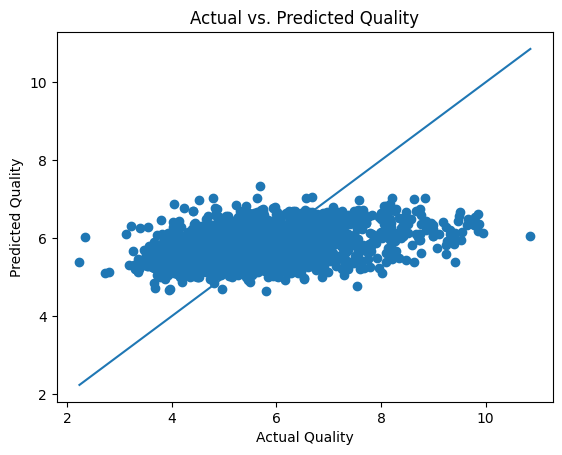

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error, r2_score
# Try to import the new RMSE function, else fallback
try:
    from sklearn.metrics import root_mean_squared_error
    def compute_rmse(y_true, y_pred):
        return root_mean_squared_error(y_true, y_pred)
except ImportError:
    import numpy as np
    def compute_rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

import matplotlib.pyplot as plt

# 1) Generate predictions with the leader model
pred_hf = aml.leader.predict(hTest)

# 2) Convert H2OFrames to pandas (multi-thread if available)
try:
    pred_pd   = pred_hf.as_data_frame(use_multi_thread=True)
    actual_pd = hTest[y].as_data_frame(use_multi_thread=True)
except TypeError:
    pred_pd   = pred_hf.as_data_frame()
    actual_pd = hTest[y].as_data_frame()

y_pred = pred_pd['predict']
y_true = actual_pd[y]

# 3) Compute metrics
rmse = compute_rmse(y_true, y_pred)
r2   = r2_score(y_true, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# 4) Plot actual vs. predicted
plt.figure()
plt.scatter(y_true, y_pred)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()])
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.show()